# Mushroom Classification - Safe to eat or deadly poison?
### Obvious Features

Group 6: Rui Li, Xi Yang, Ava (Yan) Zhang 
<br>Last Updated: 17 Mar 2021

## 1. Dataset Description

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import*
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
mushroom_df = pd.read_csv('mushrooms_obvious.csv')
mushroom_df.head()


,Unnamed: 0,class,bruises,odor,gill-size,gill-color,ring-type,spore-print-color,population
0,0,p,t,p,n,k,p,k,s
1,1,e,t,a,b,k,p,n,n
2,2,e,t,l,b,n,p,n,n
3,3,p,t,p,n,n,p,k,s
4,4,e,f,n,b,k,e,n,a


In [3]:
mushroom_df = mushroom_df.drop(mushroom_df.columns[0], axis=1)

In [8]:
mushroom_df['class'].unique()

array(['p', 'e'], dtype=object)

In [9]:
mushroom_df.shape

(8124, 8)

In [10]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   class              8124 non-null   object
 1   bruises            8124 non-null   object
 2   odor               8124 non-null   object
 3   gill-size          8124 non-null   object
 4   gill-color         8124 non-null   object
 5   ring-type          8124 non-null   object
 6   spore-print-color  8124 non-null   object
 7   population         8124 non-null   object
dtypes: object(8)
memory usage: 507.9+ KB


#### Check for the Missing Values in the Dataset

In [11]:
mushroom_df.isna().sum()

class                0
bruises              0
odor                 0
gill-size            0
gill-color           0
ring-type            0
spore-print-color    0
population           0
dtype: int64

## 2. Data visualization


Convert the catagrical variables to numerical

In [12]:
df = mushroom_df.copy()

In [13]:
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [14]:
for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])

class ['e' 'p']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']


In [15]:
df.head()

,class,bruises,odor,gill-size,gill-color,ring-type,spore-print-color,population
0,1,1,6,1,4,4,2,3
1,0,1,0,0,4,4,3,2
2,0,1,3,0,5,4,3,2
3,1,1,6,1,5,4,2,3
4,0,0,5,0,4,0,3,0


In [16]:
cor = df.corr()
cor

,class,bruises,odor,gill-size,gill-color,ring-type,spore-print-color,population
class,1.00,-0.50,-0.09,0.54,-0.53,-0.41,0.17,0.30
bruises,-0.50,1.00,-0.06,-0.37,0.53,0.69,-0.29,0.09
odor,-0.09,-0.06,1.00,0.31,-0.13,-0.28,0.47,-0.04
gill-size,0.54,-0.37,0.31,1.00,-0.52,-0.46,0.62,0.15
gill-color,-0.53,0.53,-0.13,-0.52,1.00,0.63,-0.42,-0.03
ring-type,-0.41,0.69,-0.28,-0.46,0.63,1.00,-0.49,0.21
spore-print-color,0.17,-0.29,0.47,0.62,-0.42,-0.49,1.00,-0.13
population,0.30,0.09,-0.04,0.15,-0.03,0.21,-0.13,1.00


In [17]:
# Check for the colinearity between X variables
cor[cor < 1].stack().abs().nlargest(40)[::2]

bruises     ring-type           0.69
gill-color  ring-type           0.63
gill-size   spore-print-color   0.62
class       gill-size           0.54
            gill-color          0.53
bruises     gill-color          0.53
gill-size   gill-color          0.52
class       bruises             0.50
ring-type   spore-print-color   0.49
odor        spore-print-color   0.47
gill-size   ring-type           0.46
gill-color  spore-print-color   0.42
class       ring-type           0.41
bruises     gill-size           0.37
odor        gill-size           0.31
class       population          0.30
bruises     spore-print-color   0.29
odor        ring-type           0.28
ring-type   population          0.21
class       spore-print-color   0.17
dtype: float64

In [18]:
cor_class = cor['class']
cor_class[cor_class < 1].abs().sort_values()

odor                0.09
spore-print-color   0.17
population          0.30
ring-type           0.41
bruises             0.50
gill-color          0.53
gill-size           0.54
Name: class, dtype: float64

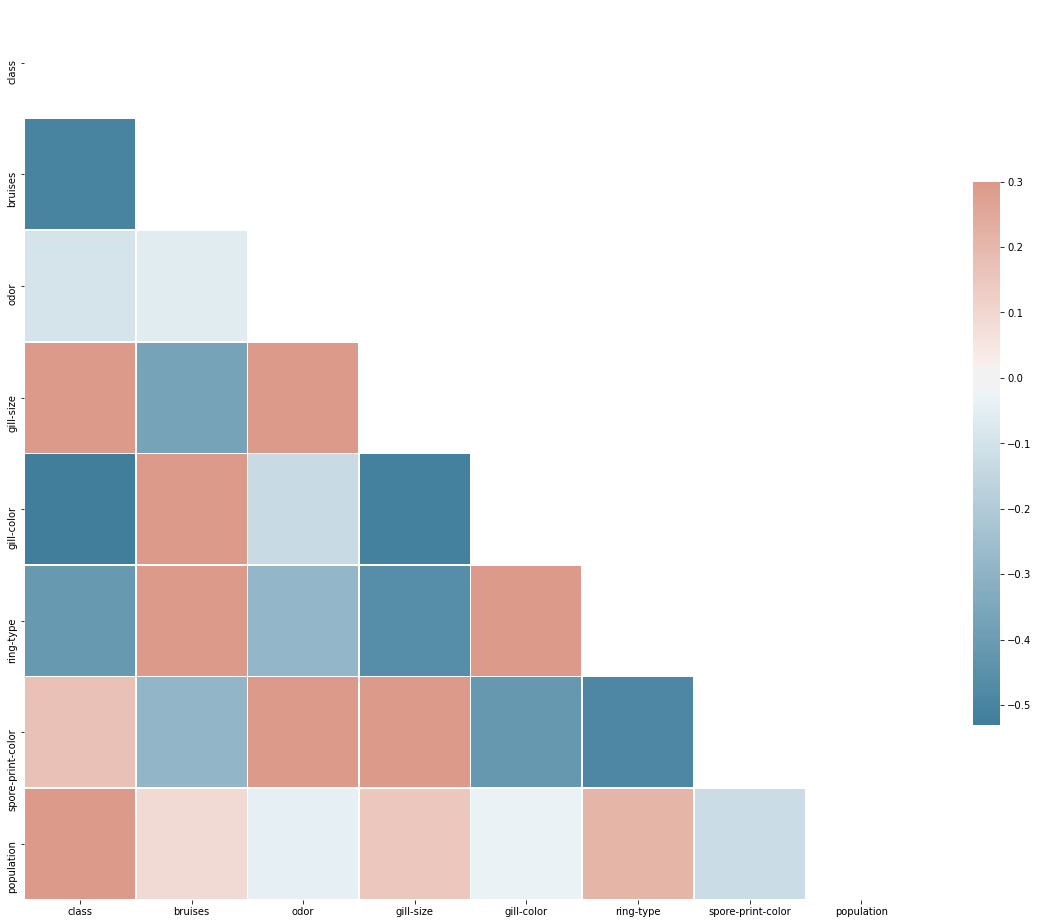

In [19]:
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [20]:
from numpy.core.defchararray import add

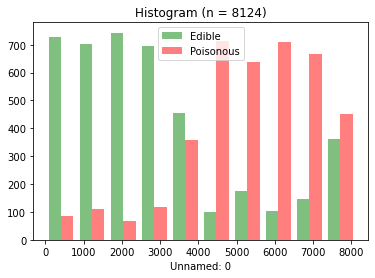

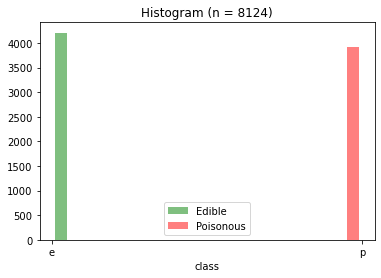

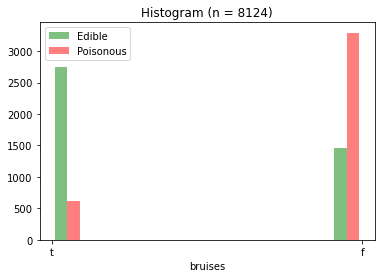

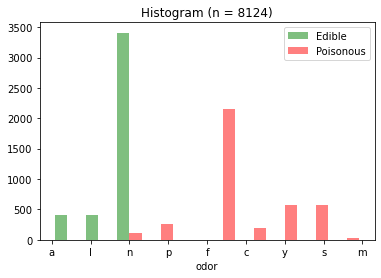

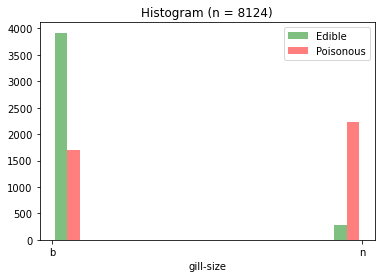

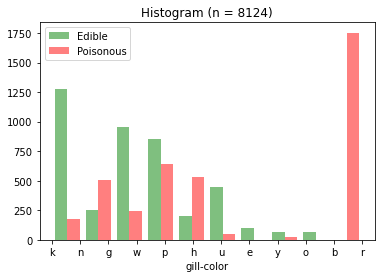

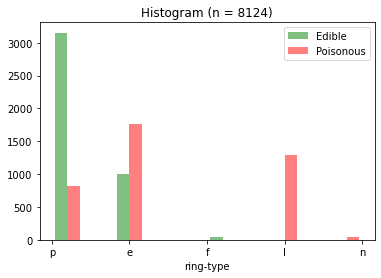

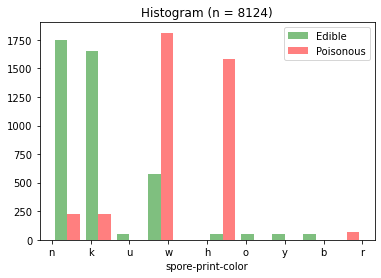

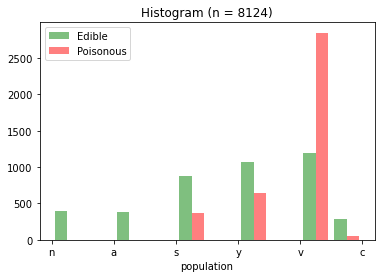

In [21]:
def histCompare(edf, pdf, feature):
    '''Plot a dual histogram of edible and poisonous mushrooms for a 
    certain feature.
    @param edf --> (pandas dataframe) a dataframe of edible mushrooms
    @param pdf --> (pandas dataframe) a dataframe of poisonous mushrooms
    @param feature --> (string) the name of the feature to be compared
    '''
    e_array = list(edf[feature])
    p_array = list(pdf[feature])
    plt.hist([e_array, p_array], color=['g', 'r'], alpha=0.5)
    plt.xlabel(feature)
    plt.title('Histogram (n = 8124)')
    plt.legend(['Edible', 'Poisonous'])
    plt.show()

# read in .csv data as pandas dataframe
mushroom_df = pd.read_csv('mushrooms_obvious.csv', encoding='utf-8')

# separate dataframe by class
edible_df = mushroom_df.loc[mushroom_df['class'] == 'e']
poisonous_df = mushroom_df.loc[mushroom_df['class'] == 'p']

# obtain list of features
features = list(mushroom_df)

# generate comparative histograms for each feature
for feat in features:
    histCompare(edible_df, poisonous_df, feat)

## 3. Feature engineering

Goals
- Use dummy variables to represent categorical data containing > 2 categories
- Use binary variables to represent features containing 2 categories
- Omit collinear, heavily skewed, or otherwise flawed features


In [22]:
def encodeDummy(df, feature):
    '''Encode a given feature into dummy variables, omitting the first
    alphabetically-sorted category. Remove the original feature.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @return df --> (pandas dataframe) modified dataframe
    '''
    labels = np.unique(df[feature])
    labels = add(feature, labels)
    le = LabelEncoder()
    dummy_labels = le.fit_transform(df[feature])
    df[feature] = dummy_labels
    dummy_features = pd.get_dummies(df[feature], drop_first=True)
    df[labels[1:]] = dummy_features
    return df.drop(feature, axis=1)
    

def encodeBinary(df, feature, positive):
    '''Encode a given feature into a binary variable with 'positive' as 1 and
    all other values as 0.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @param positive --> (str) category to be a positive binary
    @return df --> (pandas dataframe) modified dataframe
    '''
    positive_arr = df[feature] == positive
    df.loc[positive_arr, feature] = 1
    df.loc[~positive_arr, feature] = 0
    return df

def encodeOmit(df, feature):
    '''Omit feature from dataframe.
    
    @param df --> (pandas dataframe) dataframe to be modified
    @param feature --> (str) name of feature
    @return df --> (pandas dataframe) modified dataframe
    '''
    return df.drop(feature, axis=1)

# read in .csv data as pandas dataframe
mushroom_df = pd.read_csv('mushrooms_obvious.csv', encoding='utf-8')

# select features to encode or omit:bruises,odor,gill-size,gill-color,ring-type,
# spore-print-color,population
my_dummies = ['odor', 'gill-color',
              'ring-type', 'spore-print-color', 
              'population']

my_binaries = [('class', 'e'), ('bruises', 't'),
              ('gill-size', 'b')]

# my_omissions = ['stalk-surface-below-ring', 'stalk-color-below-ring',
                #'veil-type', 'veil-color']


for feat in my_dummies:
    mushroom_df = encodeDummy(mushroom_df, feat)
for feat, pos in my_binaries:
    mushroom_df = encodeBinary(mushroom_df, feat, pos)
# for feat in my_omissions:
    #mushroom_df = encodeOmit(mushroom_df, feat)


mushroom_df.to_csv('mushrooms_encoded_obv.csv')

In [23]:
data = pd.read_csv('mushrooms_encoded_obv.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,class,bruises,gill-size,odorc,odorf,odorl,odorm,odorn,odorp,odors,odory,gill-colore,gill-colorg,gill-colorh,gill-colork,gill-colorn,gill-coloro,gill-colorp,gill-colorr,gill-coloru,gill-colorw,gill-colory,ring-typef,ring-typel,ring-typen,ring-typep,spore-print-colorh,spore-print-colork,spore-print-colorn,spore-print-coloro,spore-print-colorr,spore-print-coloru,spore-print-colorw,spore-print-colory,populationc,populationn,populations,populationv,populationy
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
3,3,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,4,4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
data = data.drop(data.columns[0:2], axis=1) # omit index column
data.head()

,class,bruises,gill-size,odorc,odorf,odorl,odorm,odorn,odorp,odors,odory,gill-colore,gill-colorg,gill-colorh,gill-colork,gill-colorn,gill-coloro,gill-colorp,gill-colorr,gill-coloru,gill-colorw,gill-colory,ring-typef,ring-typel,ring-typen,ring-typep,spore-print-colorh,spore-print-colork,spore-print-colorn,spore-print-coloro,spore-print-colorr,spore-print-coloru,spore-print-colorw,spore-print-colory,populationc,populationn,populations,populationv,populationy
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
data.shape

(8124, 39)

## 4. Machine Learning Models

### Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

In [27]:
X = data.drop(['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)

In [28]:
clf = LogisticRegression(solver="lbfgs").fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted_proba = clf.predict(X_test)

print("Accuracy is: "+ str(clf.score(X_test,y_test)))
print("Recall score is: " + str(round(recall_score(y_test, predicted),3)))
print("Precision score is: " + str(round(precision_score(y_test, predicted),3)))
print("F1 score is: " + str(round(f1_score(y_test, predicted),3)))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, predicted))

Accuracy is: 0.9955686853766618
Recall score is: 1.0
Precision score is: 0.991
F1 score is: 0.996

Confusion matrix:
[[ 975    9]
 [   0 1047]]


In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9954268292682926

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(-0.05, 1.05, -0.05, 1.05)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

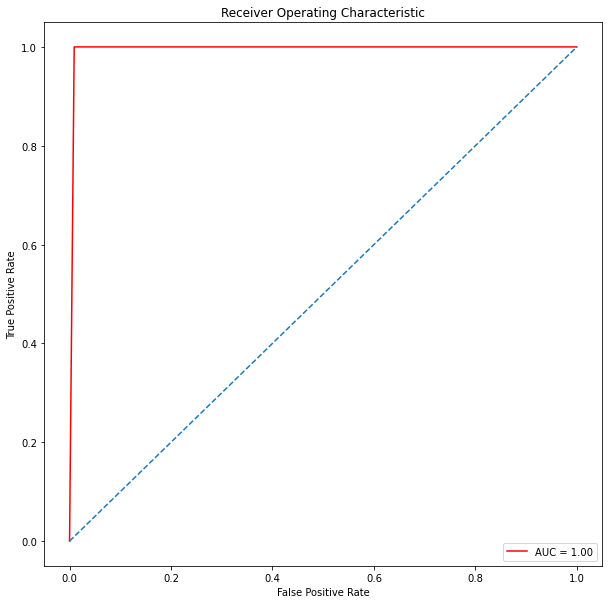

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [31]:
#Tuned model
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
                    'penalty':['l1','l2']
                   }

from sklearn.model_selection import GridSearchCV
LR= GridSearchCV(LR_model, tuned_parameters,cv=10)

LR.fit(X_train,y_train)

print(LR.best_params_)

y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_test)

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

{'C': 10, 'penalty': 'l2'}


1.0

array([[ 978,    6],
       [   0, 1047]])

In [32]:
data.corr()

,class,bruises,gill-size,odorc,odorf,odorl,odorm,odorn,odorp,odors,odory,gill-colore,gill-colorg,gill-colorh,gill-colork,gill-colorn,gill-coloro,gill-colorp,gill-colorr,gill-coloru,gill-colorw,gill-colory,ring-typef,ring-typel,ring-typen,ring-typep,spore-print-colorh,spore-print-colork,spore-print-colorn,spore-print-coloro,spore-print-colorr,spore-print-coloru,spore-print-colorw,spore-print-colory,populationc,populationn,populations,populationv,populationy
class,1.00,0.50,0.54,-0.16,-0.62,0.22,-0.07,0.79,-0.19,-0.29,-0.29,0.11,-0.12,-0.15,0.15,0.29,0.09,0.05,-0.06,0.20,0.23,0.05,0.07,-0.45,-0.07,0.54,-0.49,0.40,0.42,0.07,-0.10,0.07,-0.36,0.07,0.14,0.22,0.16,-0.44,0.11
bruises,0.50,1.00,0.37,-0.13,-0.34,0.27,-0.06,0.29,0.21,-0.23,-0.23,0.13,-0.14,-0.18,0.03,0.21,-0.08,0.04,0.06,0.24,0.34,-0.09,-0.07,-0.37,-0.06,0.77,-0.24,0.34,0.33,-0.07,0.11,0.09,-0.42,-0.07,0.07,0.10,0.07,-0.18,0.16
gill-size,0.54,0.37,1.00,-0.23,0.06,0.09,0.04,0.46,-0.27,-0.41,-0.41,0.07,0.15,0.20,0.05,0.12,0.06,0.19,0.04,0.10,0.13,0.06,-0.12,0.29,0.04,0.31,0.30,0.19,0.18,0.05,0.06,-0.12,-0.63,0.05,0.12,0.15,0.12,-0.51,0.30
odorc,-0.16,-0.13,-0.23,1.00,-0.09,-0.04,-0.01,-0.14,-0.03,-0.04,-0.04,-0.02,0.08,-0.05,-0.04,0.06,-0.01,0.03,-0.01,0.12,-0.06,-0.02,-0.01,-0.07,-0.01,0.16,-0.08,0.10,0.09,-0.01,-0.01,-0.01,-0.10,-0.01,-0.03,-0.04,0.15,0.00,-0.08
odorf,-0.62,-0.34,0.06,-0.09,1.00,-0.14,-0.04,-0.53,-0.11,-0.17,-0.17,-0.07,0.22,0.32,-0.14,-0.23,-0.05,0.09,-0.03,-0.15,-0.18,-0.06,-0.05,0.72,-0.04,-0.43,0.80,-0.33,-0.34,-0.05,-0.06,-0.05,-0.04,-0.05,-0.13,-0.14,-0.15,0.16,0.13
odorl,0.22,0.27,0.09,-0.04,-0.14,1.00,-0.02,-0.20,-0.04,-0.06,-0.06,-0.02,0.05,-0.07,0.11,0.10,-0.02,-0.04,-0.01,-0.06,0.08,-0.02,-0.02,-0.10,-0.02,0.23,-0.11,0.11,0.14,-0.02,-0.02,0.16,-0.15,-0.02,-0.05,0.28,0.18,-0.17,-0.05
odorm,-0.07,-0.06,0.04,-0.01,-0.04,-0.02,1.00,-0.06,-0.01,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,-0.03,-0.01,-0.03,-0.00,-0.02,0.07,0.32,-0.01,-0.03,1.00,-0.07,-0.03,-0.04,-0.04,-0.01,-0.01,-0.01,0.10,-0.01,0.32,-0.02,-0.03,-0.07,-0.03
odorn,0.79,0.29,0.46,-0.14,-0.53,-0.20,-0.06,1.00,-0.16,-0.24,-0.24,0.12,-0.16,-0.10,0.04,0.19,0.10,0.07,0.06,0.24,0.19,0.07,0.09,-0.38,-0.06,0.35,-0.41,0.28,0.28,0.09,0.11,-0.07,-0.23,0.09,0.19,-0.03,-0.01,-0.28,0.14
odorp,-0.19,0.21,-0.27,-0.03,-0.11,-0.04,-0.01,-0.16,1.00,-0.05,-0.05,-0.02,-0.06,-0.06,0.16,0.07,-0.02,0.03,-0.01,-0.05,0.05,-0.02,-0.01,-0.08,-0.01,0.18,-0.09,0.12,0.11,-0.01,-0.02,-0.01,-0.12,-0.01,-0.04,-0.04,0.17,0.00,-0.09
odors,-0.29,-0.23,-0.41,-0.04,-0.17,-0.06,-0.02,-0.24,-0.05,1.00,-0.08,-0.03,-0.09,-0.09,-0.06,-0.11,-0.02,-0.13,-0.02,-0.07,-0.12,-0.03,-0.02,-0.12,-0.02,-0.27,-0.14,-0.15,-0.16,-0.02,-0.03,-0.02,0.43,-0.02,-0.06,-0.06,-0.12,0.28,-0.14


In [33]:
LR_model= LogisticRegression(C=10)

clf2 = LR_model.fit(X_train,y_train)
predicted = clf2.predict(X_test)
predicted_proba = clf2.predict(X_test)

print("Accuracy is: "+ str(clf2.score(X_test,y_test)))

Accuracy is: 0.9970457902511078


In [34]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9969512195121951

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(-0.05, 1.05, -0.05, 1.05)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

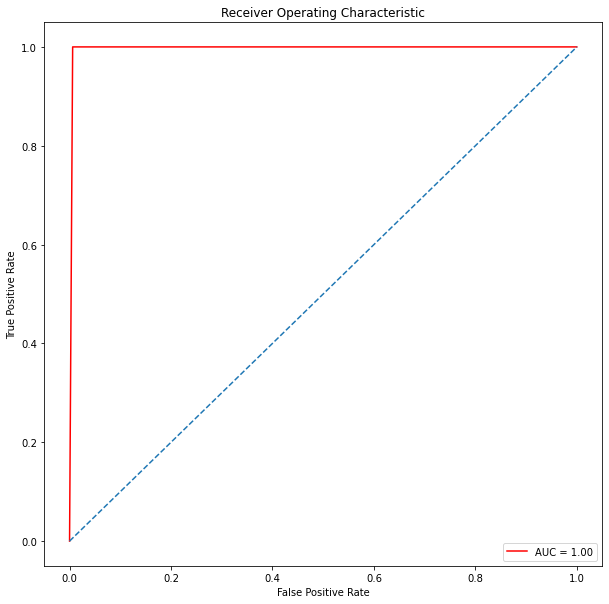

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0, 0.5, 'variable name')

Text(0.5, 1.0, 'Classification - TOP20 features (importance)')

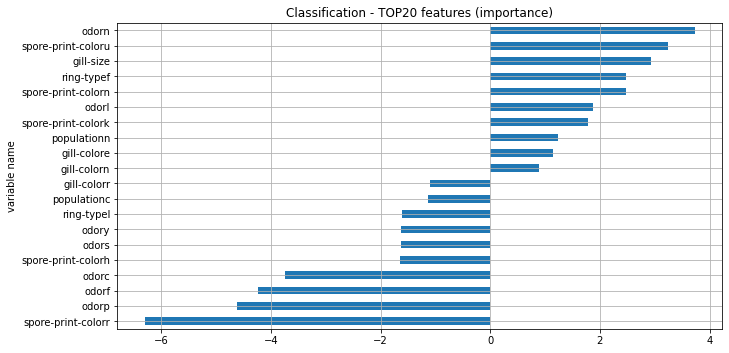

In [36]:
values = clf.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")

In [37]:
Importance_Ranking = pd.concat([importance["value"].head(40),importance["value"].tail(40)]).sort_values(ascending=False)
Importance_Ranking

name
odorn                 3.73
odorn                 3.73
spore-print-coloru    3.23
spore-print-coloru    3.23
gill-size             2.93
gill-size             2.93
ring-typef            2.49
ring-typef            2.49
spore-print-colorn    2.47
spore-print-colorn    2.47
odorl                 1.88
odorl                 1.88
spore-print-colork    1.79
spore-print-colork    1.79
populationn           1.24
populationn           1.24
gill-colore           1.14
gill-colore           1.14
gill-colorn           0.88
gill-colorn           0.88
bruises               0.73
bruises               0.73
gill-colorp           0.73
gill-colorp           0.73
populationy           0.53
populationy           0.53
gill-colorw           0.50
gill-colorw           0.50
spore-print-coloro    0.46
spore-print-coloro    0.46
spore-print-colory    0.45
spore-print-colory    0.45
gill-coloro           0.45
gill-coloro           0.45
gill-colork           0.44
gill-colork           0.44
gill-coloru           0

### Naive Bayes Model

In [38]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB()

In [39]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_test)

1.0

In [40]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 2031 points : 14


In [41]:
scores = cross_val_score(model_naive, X_test, y_test, cv=10, scoring='accuracy')
print((scores).mean())

0.9931082777938762


In [42]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[ 970,   14],
       [   0, 1047]])

In [43]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9928861788617885

### Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [45]:
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

RandomForestClassifier(max_depth=5)

0.9898243886427047

In [46]:
predictions = rf.predict(X_test)
rf.score(X_test , y_test)

0.983259478089611

In [47]:
accuracy_score(y_test , predictions)

0.983259478089611

### Decision Tree

In [48]:
X = df.drop(['class'], axis=1) 
y = df['class']

#X = data.iloc[:,1:23]  
#y = data.iloc[:,0]  
X.head()
y.head()

,bruises,odor,gill-size,gill-color,ring-type,spore-print-color,population
0,1,6,1,4,4,2,3
1,1,0,0,4,4,3,2
2,1,3,0,5,4,3,2
3,1,6,1,5,4,2,3
4,0,5,0,4,0,3,0


0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape

(6499, 7)

In [50]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score

0.9956923076923077

In [51]:
clf.feature_importances_  

array([0.        , 0.13879426, 0.147654  , 0.27080849, 0.        ,
       0.42505571, 0.01768753])

In [52]:
feature_name=['bruises','odor','gill-size','gill-color',\
              'ring-type','spore-print-color','population']
print(len(feature_name))

7


In [53]:
[*zip(feature_name,clf.feature_importances_)]

[('bruises', 0.0),
 ('odor', 0.13879426301552936),
 ('gill-size', 0.14765400287808997),
 ('gill-color', 0.2708084903513495),
 ('ring-type', 0.0),
 ('spore-print-color', 0.425055710031869),
 ('population', 0.01768753372316212)]

In [54]:
clf=tree.DecisionTreeClassifier(criterion='entropy'      
                                ,random_state=30
                                ,splitter='random')
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
score

0.9956923076923077

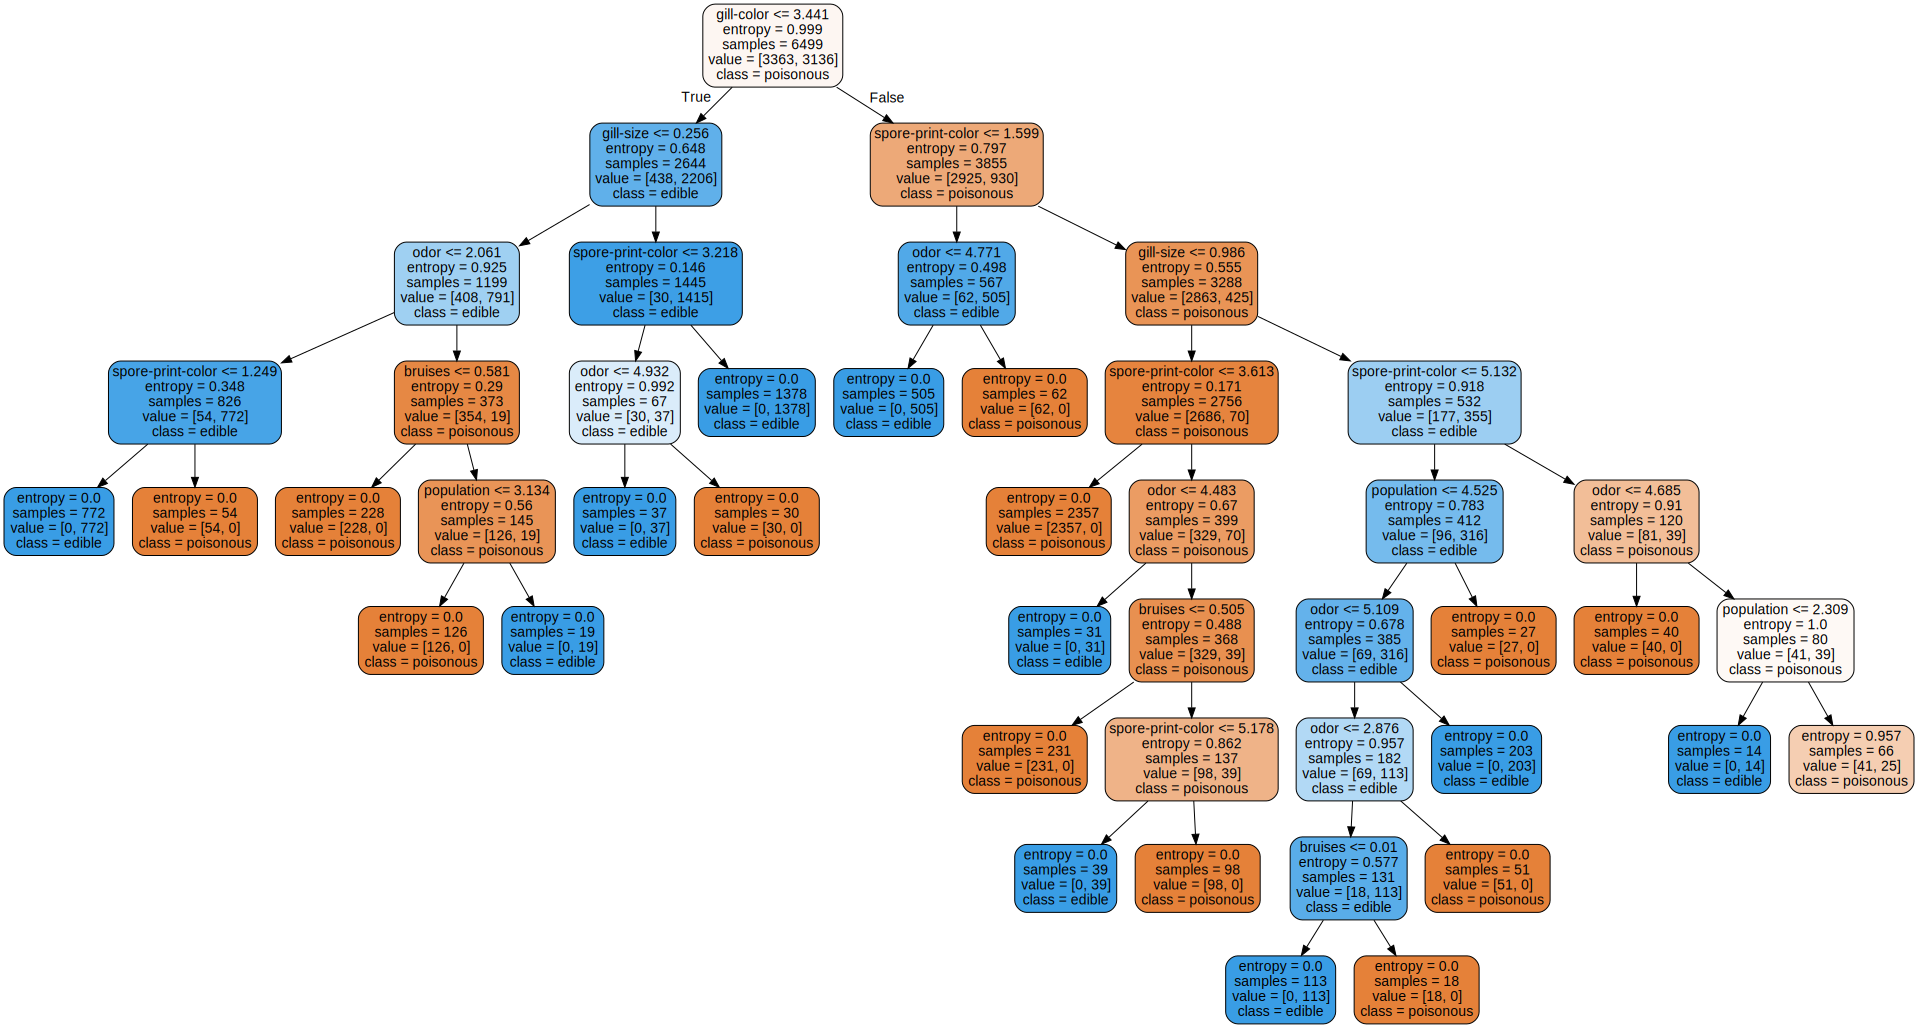

In [55]:
import graphviz
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=['poisonous','edible']
                             ,filled=True
                             ,rounded=True)
graph=graphviz.Source(dot_data)
graph

Text(0.5, 1.0, 'Normalized Confusion Matrix of Mushroom Dataset')

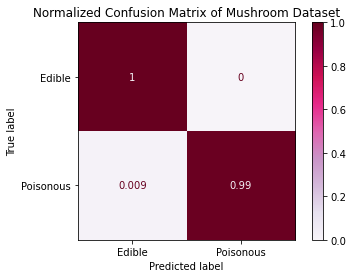

In [56]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

### Kernel SVM Model

In [57]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

### Neural Networks

In [58]:
data = data.sample(frac=1)  #shuffle encoded data
# partition into training (60%), validation (20%), and test set (20%)
samples = data.shape[0]
train_count = round(samples * 0.6)
val_count = round(samples * 0.2)
test_count = samples - train_count - val_count

train_df = data.iloc[:train_count]
validation_df = data.iloc[train_count:train_count + val_count]
test_df = data.iloc[-test_count:]

X_train = train_df.drop(['class'], axis=1)
X_validation = validation_df.drop(['class'], axis=1)
X_test = test_df.drop(['class'], axis=1)

y_train = train_df['class']
y_validation = validation_df['class']
y_test = test_df['class']

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import mglearn
from sklearn.neural_network import MLPRegressor


In [60]:
# Basic Neural Networks model
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train)*100)
print(mlp.score(X_validation, y_validation)*100)
print(mlp.score(X_test, y_test)*100)

99.58965941731637
99.56923076923077
99.6923076923077


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

### DNN (Deep Neural Networks)
K-Nearest Neighbors(K-NN) Model??

In [62]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import binary_crossentropy
from keras.layers import Dense, Activation

In [63]:
num_features = data.shape[1] - 1
num_features

38

In [64]:
### Build neural network architecture ###
num_features = data.shape[1] - 1

model = Sequential([
    Dense(16, input_shape=(num_features,)),
    Activation('relu'),
    Dense(12),
    Activation('relu'),
    Dense(8),
    Activation('relu'),
    Dense(4),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid')
])


In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                624       
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3

In [72]:
my_epochs =50
history = model.fit(X_train, y_train, epochs=my_epochs, batch_size=20,
                    validation_data=(X_test, y_test))

Epoch 1/50
244/244 [==============================] - 1s 3ms/step - loss: 0.0079 - binary_accuracy: 0.9947 - val_loss: 0.0062 - val_binary_accuracy: 0.9969
Epoch 2/50
244/244 [==============================] - 1s 3ms/step - loss: 0.0072 - binary_accuracy: 0.9963 - val_loss: 0.0062 - val_binary_accuracy: 0.9969
Epoch 3/50
244/244 [==============================] - 1s 2ms/step - loss: 0.0079 - binary_accuracy: 0.9953 - val_loss: 0.0062 - val_binary_accuracy: 0.9969
Epoch 4/50
244/244 [==============================] - 1s 3ms/step - loss: 0.0079 - binary_accuracy: 0.9953 - val_loss: 0.0069 - val_binary_accuracy: 0.9932
Epoch 5/50
244/244 [==============================] - 1s 3ms/step - loss: 0.0075 - binary_accuracy: 0.9957 - val_loss: 0.0075 - val_binary_accuracy: 0.9932
Epoch 6/50
244/244 [==============================] - 1s 3ms/step - loss: 0.0076 - binary_accuracy: 0.9945 - val_loss: 0.0062 - val_binary_accuracy: 0.9969
Epoch 7/50
244/244 [==============================] - 1s 3ms/ste

In [68]:
pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.44,0.83,0.32,0.98
1,0.17,0.99,0.02,0.99
2,0.01,0.99,0.01,0.99
3,0.01,0.99,0.01,1.00
4,0.01,1.00,0.01,1.00
5,0.01,1.00,0.01,1.00
6,0.01,1.00,0.01,1.00
7,0.01,0.99,0.01,1.00
8,0.01,1.00,0.01,0.99
9,0.01,0.99,0.01,0.99


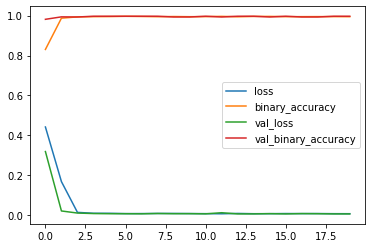

In [69]:
pd.DataFrame(history.history).plot()

In [70]:
score = model.evaluate(X_validation, y_validation, verbose=0)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)


print("Validation Accuracy: {:.2f}".format(score[1]*100))
print('Test Accuracy: %.2f' % (accuracy*100))

Validation Accuracy: 99.57
Test Accuracy: 99.69


In [71]:
from keras.layers import Dropout

num_features = data.shape[1] - 1

model_dropout = Sequential([
    Dense(16, input_shape=(num_features,)),
    Activation('relu'),
    Dropout(.5),
    Dense(12),
    Activation('relu'),
    Dropout(.5),
    Dense(8),
    Activation('relu'),
    Dropout(.5),
    Dense(4),
    Activation('relu'),
    Dropout(.5),
    Dense(1),
    Activation('sigmoid')
])

model_dropout.compile("adam", "binary_crossentropy", metrics=['binary_accuracy'])

my_epochs = 50
history_dropout = model_dropout.fit(X_train, y_train, epochs=my_epochs, batch_size=20,
                    validation_data=(X_test, y_test))


Epoch 1/50
244/244 [==============================] - 2s 3ms/step - loss: 0.6840 - binary_accuracy: 0.5267 - val_loss: 0.6280 - val_binary_accuracy: 0.9015
Epoch 2/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6383 - binary_accuracy: 0.6101 - val_loss: 0.4663 - val_binary_accuracy: 0.9317
Epoch 3/50
244/244 [==============================] - 1s 4ms/step - loss: 0.5297 - binary_accuracy: 0.7464 - val_loss: 0.2736 - val_binary_accuracy: 0.9852
Epoch 4/50
244/244 [==============================] - 1s 3ms/step - loss: 0.4522 - binary_accuracy: 0.7899 - val_loss: 0.1891 - val_binary_accuracy: 0.9858
Epoch 5/50
244/244 [==============================] - 1s 4ms/step - loss: 0.3781 - binary_accuracy: 0.8148 - val_loss: 0.1516 - val_binary_accuracy: 0.9834
Epoch 6/50
244/244 [==============================] - 1s 3ms/step - loss: 0.3657 - binary_accuracy: 0.8228 - val_loss: 0.1278 - val_binary_accuracy: 0.9932
Epoch 7/50
244/244 [==============================] - 1s 4ms/ste

In [73]:
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                624       
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                204       
_________________________________________________________________
activation_6 (Activation)    (None, 12)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                

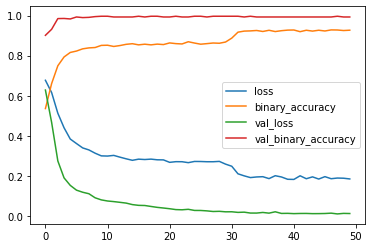

In [74]:
df = pd.DataFrame(history_dropout.history).plot()

In [75]:
score = model_dropout.evaluate(X_validation, y_validation, verbose=0)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)


print("Validation Accuracy: {:.2f}".format(score[1]*100))
print('Test Accuracy: %.2f' % (accuracy*100))

Validation Accuracy: 99.45
Test Accuracy: 99.69


## Bundled Together

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X = data.drop(['class'], axis=1)
y = data['class']
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((6499, 7), (6499,))

((1625, 7), (1625,))

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [78]:
names = ["Logistic_Regression", "Logistic_Regression_Tuned", "Nearest_Neighbors", "Linear_SVM", 
         "Polynomial_SVM", "Gradient_Boosting", 
         "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    LogisticRegression(solver="lbfgs"),
    LogisticRegression(solver="lbfgs", C=100),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=10),
    SVC(kernel="poly", degree=3, C=10),
#     SVC(kernel="rbf", C=1, gamma=2),  #, "RBF_SVM"
#     GaussianProcessClassifier(1.0 * RBF(1.0)),  #"Gaussian_Process",
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha = 1, hidden_layer_sizes=50, max_iter=1000, random_state=0),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [79]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

LogisticRegression()

LogisticRegression(C=100)

KNeighborsClassifier(n_neighbors=3)

SVC(C=10, kernel='linear')

SVC(C=10, kernel='poly')

GradientBoostingClassifier(learning_rate=1.0)

DecisionTreeClassifier(max_depth=5)

ExtraTreesClassifier(n_estimators=10)

RandomForestClassifier(max_depth=5)

MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=1000, random_state=0)

AdaBoostClassifier(n_estimators=100)

GaussianNB()

QuadraticDiscriminantAnalysis()

SGDClassifier()

In [80]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by="score", ascending=False)

,name,score
2,Nearest_Neighbors,1.00
5,Gradient_Boosting,1.00
7,Extra_Trees,1.00
10,AdaBoost,1.00
4,Polynomial_SVM,0.99
8,Random_Forest,0.98
6,Decision_Tree,0.98
9,Neural_Net,0.98
12,QDA,0.94
3,Linear_SVM,0.92


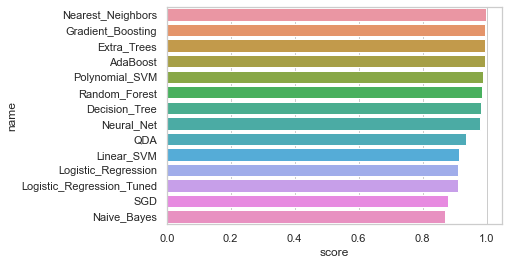

In [81]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df.sort_values(by="score", ascending=False))